# 📊 Capstone Project – Week 1 & 2: EDA & Preprocessing Notebook

### 🧾 Project Title:
**Predicting Insurance Premiums with Data-Driven Insights for SecureLife Insurance Co.**

---

### 👤 Submitted by:
**Emmanuel Obiorah**  
**Cohort 3 Fellow ID: FE/24/4793145479**  
📅 **Week 1–2 Deliverable**

---

### 🎯 Objective:
To build a regression model that accurately predicts the **insurance premium amount** based on customer demographics, policy, and lifestyle data.

In this notebook, I will:
- ✅ Load and inspect the dataset  
- ✅ Clean and preprocess the data  
- ✅ Explore key patterns through visualization (EDA)  
- ✅ Document all decisions and insights

---

### 📂 Dataset Details:
- Rows: ~278,000  
- Columns: 20  
- Target variable: `Premium Amount`

---

### 🛠️ Libraries Used:
- Python (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- scikit-learn (for modeling in future steps)

---

Let's begin the journey 🚀


In [26]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styling (safe defaults for Colab)
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 6)

# 📥 Step 2: Load the dataset
file_path = "/content/Insurance Premium Prediction Dataset.csv"  # adjust if your filename is different
df = pd.read_csv(file_path)

# ✅ Step 3: Display first few rows
df.head(20000)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,27.0,Male,3382.0,Divorced,3.0,Master's,Employed,19.754583,Rural,Comprehensive,0.0,17,845.0,8,8.0,2024-03-02 15:21:39.093681,Average,Yes,Monthly,Apartment
19996,61.0,Male,112630.0,Married,3.0,PhD,Unemployed,5.191339,Suburban,Basic,3.0,7,NaN,3,1626.0,2020-05-14 15:21:39.093681,Average,No,Daily,Apartment
19997,51.0,Male,1896.0,Married,1.0,Bachelor's,Self-Employed,27.903003,Suburban,Comprehensive,1.0,2,467.0,3,28.0,2021-03-31 15:21:39.093681,Good,No,Monthly,Condo
19998,43.0,Female,NaN,Divorced,4.0,Bachelor's,Employed,50.206651,Urban,Premium,3.0,14,504.0,9,239.0,2024-01-12 15:21:39.093681,Good,Yes,Monthly,Apartment


In [27]:
# Check dimensions
print(f"Dataset has {df.shape[0]:,} rows and {df.shape[1]} columns.\n")

# Show data types and non-null counts
df.info()

# Show statistical summary
df.describe(include='all')


Dataset has 278,860 rows and 20 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Am

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,274175.000000,278860,264905.000000,273841,250974.000000,278860,197572,268263.000000,278860,278860,197572.000000,278860.000000,250974.000000,278860.000000,277019.000000,278860,260511,278860,278860,278860
unique,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,NaN,181607,3,2,4,3
top,NaN,Male,NaN,Single,NaN,PhD,Self-Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,NaN,2022-08-30 15:21:39.134960,Average,Yes,Weekly,House
freq,NaN,139754,NaN,91497,NaN,69955,65908,NaN,93482,93298,NaN,NaN,NaN,NaN,NaN,16,86906,139635,70238,93228
mean,41.020771,NaN,42089.085329,NaN,1.998048,NaN,NaN,28.584290,NaN,NaN,0.998117,9.520283,574.362049,5.007764,966.118667,NaN,NaN,NaN,NaN,NaN
std,13.549683,NaN,35444.517255,NaN,1.412312,NaN,NaN,15.966208,NaN,NaN,1.000795,5.767915,158.792037,2.581349,909.404567,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.035436,NaN,NaN,0.000000,0.000000,300.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,13588.000000,NaN,1.000000,NaN,NaN,16.149890,NaN,NaN,0.000000,5.000000,437.000000,3.000000,286.000000,NaN,NaN,NaN,NaN,NaN
50%,41.000000,NaN,32191.000000,NaN,2.000000,NaN,NaN,26.451244,NaN,NaN,1.000000,10.000000,575.000000,5.000000,688.000000,NaN,NaN,NaN,NaN,NaN
75%,53.000000,NaN,62164.000000,NaN,3.000000,NaN,NaN,38.966369,NaN,NaN,2.000000,15.000000,712.000000,7.000000,1367.000000,NaN,NaN,NaN,NaN,NaN


In [28]:
# Count missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Previous Claims,81288
Occupation,81288
Credit Score,27886
Number of Dependents,27886
Customer Feedback,18349
Annual Income,13955
Health Score,10597
Marital Status,5019
Age,4685
Premium Amount,1841


## Data Cleaning & Feature Formatting

In this section, we will:

1. Handle missing values in both numerical and categorical columns  
2. Convert the improperly formatted `Policy Start Date` column  
3. Create a new feature: **Policy Age** (in years since policy started)

Cleaning the data helps prevent errors in model training and ensures consistent formats.


In [29]:
# STEP 4A: Drop rows with missing target (Premium Amount)
df = df.dropna(subset=['Premium Amount']).copy()
# STEP 4B: Fill missing numerical values using median
num_cols = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Number of Dependents']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# STEP 4C: Fill missing categorical columns using mode
cat_cols = ['Occupation', 'Marital Status']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# STEP 4D: Fill 'Previous Claims' with 0 (assume no prior claim)
df['Previous Claims'] = df['Previous Claims'].fillna(0)

# STEP 4E: Fill 'Customer Feedback' with 'Unknown'
df['Customer Feedback'] = df['Customer Feedback'].fillna("Unknown")


In [32]:
# STEP 4F: Convert 'Policy Start Date' to datetime format
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

# STEP 4G: Create new column: 'Policy Age' (in years)
today = pd.to_datetime("2025-08-01")  # Reference date for consistency
df['Policy Age'] = (today - df['Policy Start Date']).dt.days // 365

# ✅ Check result
df[['Policy Start Date', 'Policy Age']].head()


,Policy Start Date,Policy Age
0,2022-12-10 15:21:39.078837,2
1,2023-01-31 15:21:39.078837,2
2,2023-11-26 15:21:39.078837,1
3,2023-02-27 15:21:39.078837,2
4,2020-11-25 15:21:39.078837,4


## Correlation Heatmap

This heatmap helps us understand:
- How strongly numerical variables relate to each other
- Which features may influence `Premium Amount`
- Whether any variables are redundant (too highly correlated)

A correlation closer to:
- **+1** = strong positive correlation  
- **–1** = strong negative correlation  
- **0** = no correlation


/tmp/ipython-input-186157490.py:17: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


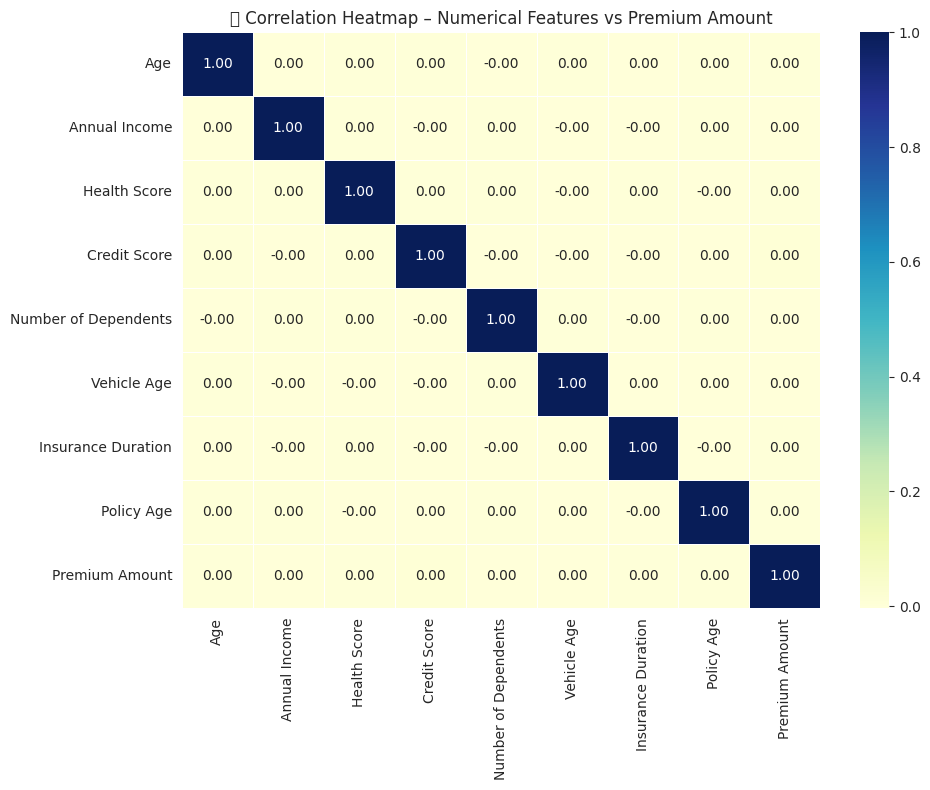

In [33]:
# 🧮 Define numerical features again (reset)
numerical_features = [
    'Age', 'Annual Income', 'Health Score', 'Credit Score',
    'Number of Dependents', 'Vehicle Age', 'Insurance Duration', 'Policy Age'
]

# Add target
numerical_plus_target = numerical_features + ['Premium Amount']

# Recalculate correlation matrix
corr_matrix = df[numerical_plus_target].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("🔗 Correlation Heatmap – Numerical Features vs Premium Amount")
plt.tight_layout()
plt.show()


In [34]:
# Check column data types (some may be 'object' instead of numeric)
df[numerical_plus_target].dtypes


,0
Age,float64
Annual Income,float64
Health Score,float64
Credit Score,float64
Number of Dependents,float64
Vehicle Age,int64
Insurance Duration,int64
Policy Age,int64
Premium Amount,float64


In [35]:
# Convert all numerical columns to numeric (if not already)
for col in numerical_plus_target:
    df[col] = pd.to_numeric(df[col], errors='coerce')


/tmp/ipython-input-1445204264.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


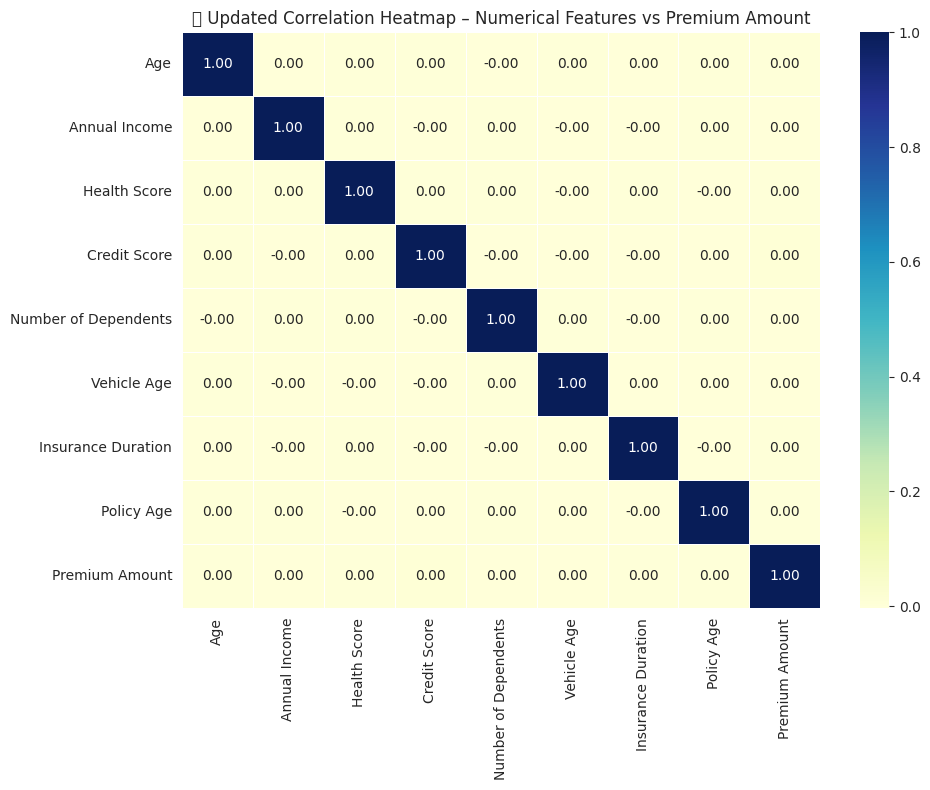

In [36]:
# Recompute correlation
corr_matrix = df[numerical_plus_target].corr()

# Plot again
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("🔗 Updated Correlation Heatmap – Numerical Features vs Premium Amount")
plt.tight_layout()
plt.show()

In [37]:
df[numerical_plus_target].head(10)


,Age,Annual Income,Health Score,Credit Score,Number of Dependents,Vehicle Age,Insurance Duration,Policy Age,Premium Amount
0,56.0,99990.0,31.074627,320.0,1.0,13,5,2,308.0
1,46.0,2867.0,50.271335,694.0,1.0,3,4,2,517.0
2,32.0,30154.0,14.714909,652.0,3.0,16,8,1,849.0
3,60.0,48371.0,25.346926,330.0,0.0,11,7,2,927.0
4,25.0,54174.0,6.659499,575.0,0.0,9,8,4,303.0
5,38.0,31769.0,14.736611,521.0,1.0,9,7,4,4016.0
6,56.0,26209.0,33.238300,424.0,1.0,10,5,4,828.0
7,36.0,8762.0,13.887880,641.0,3.0,15,9,2,1678.0
8,40.0,29471.0,31.565248,796.0,4.0,14,7,2,975.0
9,28.0,94317.0,38.957197,750.0,3.0,9,9,2,1766.0


/tmp/ipython-input-827573233.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


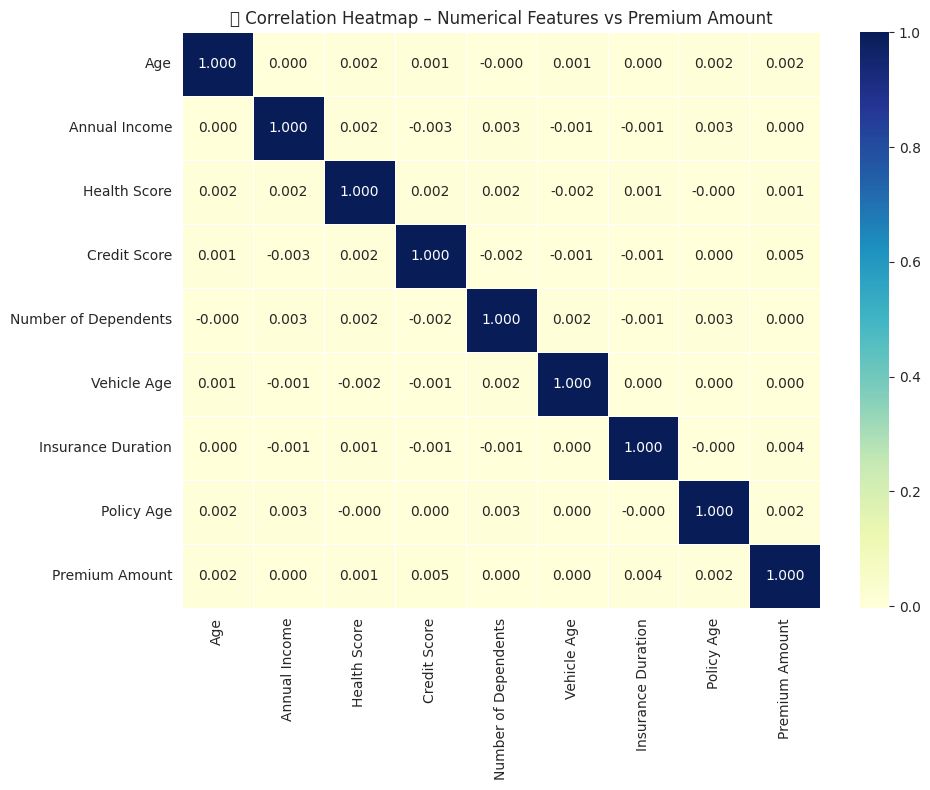

In [38]:
# Plot corrected correlation heatmap (3 decimal places)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', linewidths=0.5)
plt.title("🔗 Correlation Heatmap – Numerical Features vs Premium Amount")
plt.tight_layout()
plt.show()


## 📊Categorical Features vs Premium Amount

Numerical correlations were weak, so now we’ll explore how `Premium Amount` varies across categorical groups.

This helps uncover hidden insights like:
- Do males pay more than females?
- Does smoking lead to higher premiums?
- Which policy type is most expensive?

We’ll use bar plots to show the **average premium per category**.


## 📊 Visualizing Average Premiums by Categorical Features

While numerical correlation with `Premium Amount` was weak, it's important to analyze categorical variables as well. These features often capture real-world distinctions that numbers can't, such as lifestyle, policy choices, and risk categories.

We selected the following key categorical features to visualize how they affect premium costs:

- **Gender**
- **Smoking Status**
- **Policy Type**
- **Property Type**
- **Education Level**

For each category, we plotted a **bar chart** showing the **average premium paid** by customers in that group.

This helps answer questions like:
- Do smokers or males pay more on average?
- Which policy type leads to the highest premium?
- Are customers with higher education levels paying lower premiums?

Each bar represents the **mean premium amount** for the respective group. This step provides visual insights that guide our feature selection, modeling, and interpretation later in the project.


/tmp/ipython-input-3022493017.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-3022493017.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-3022493017.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-3022493017.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-3022493017.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount

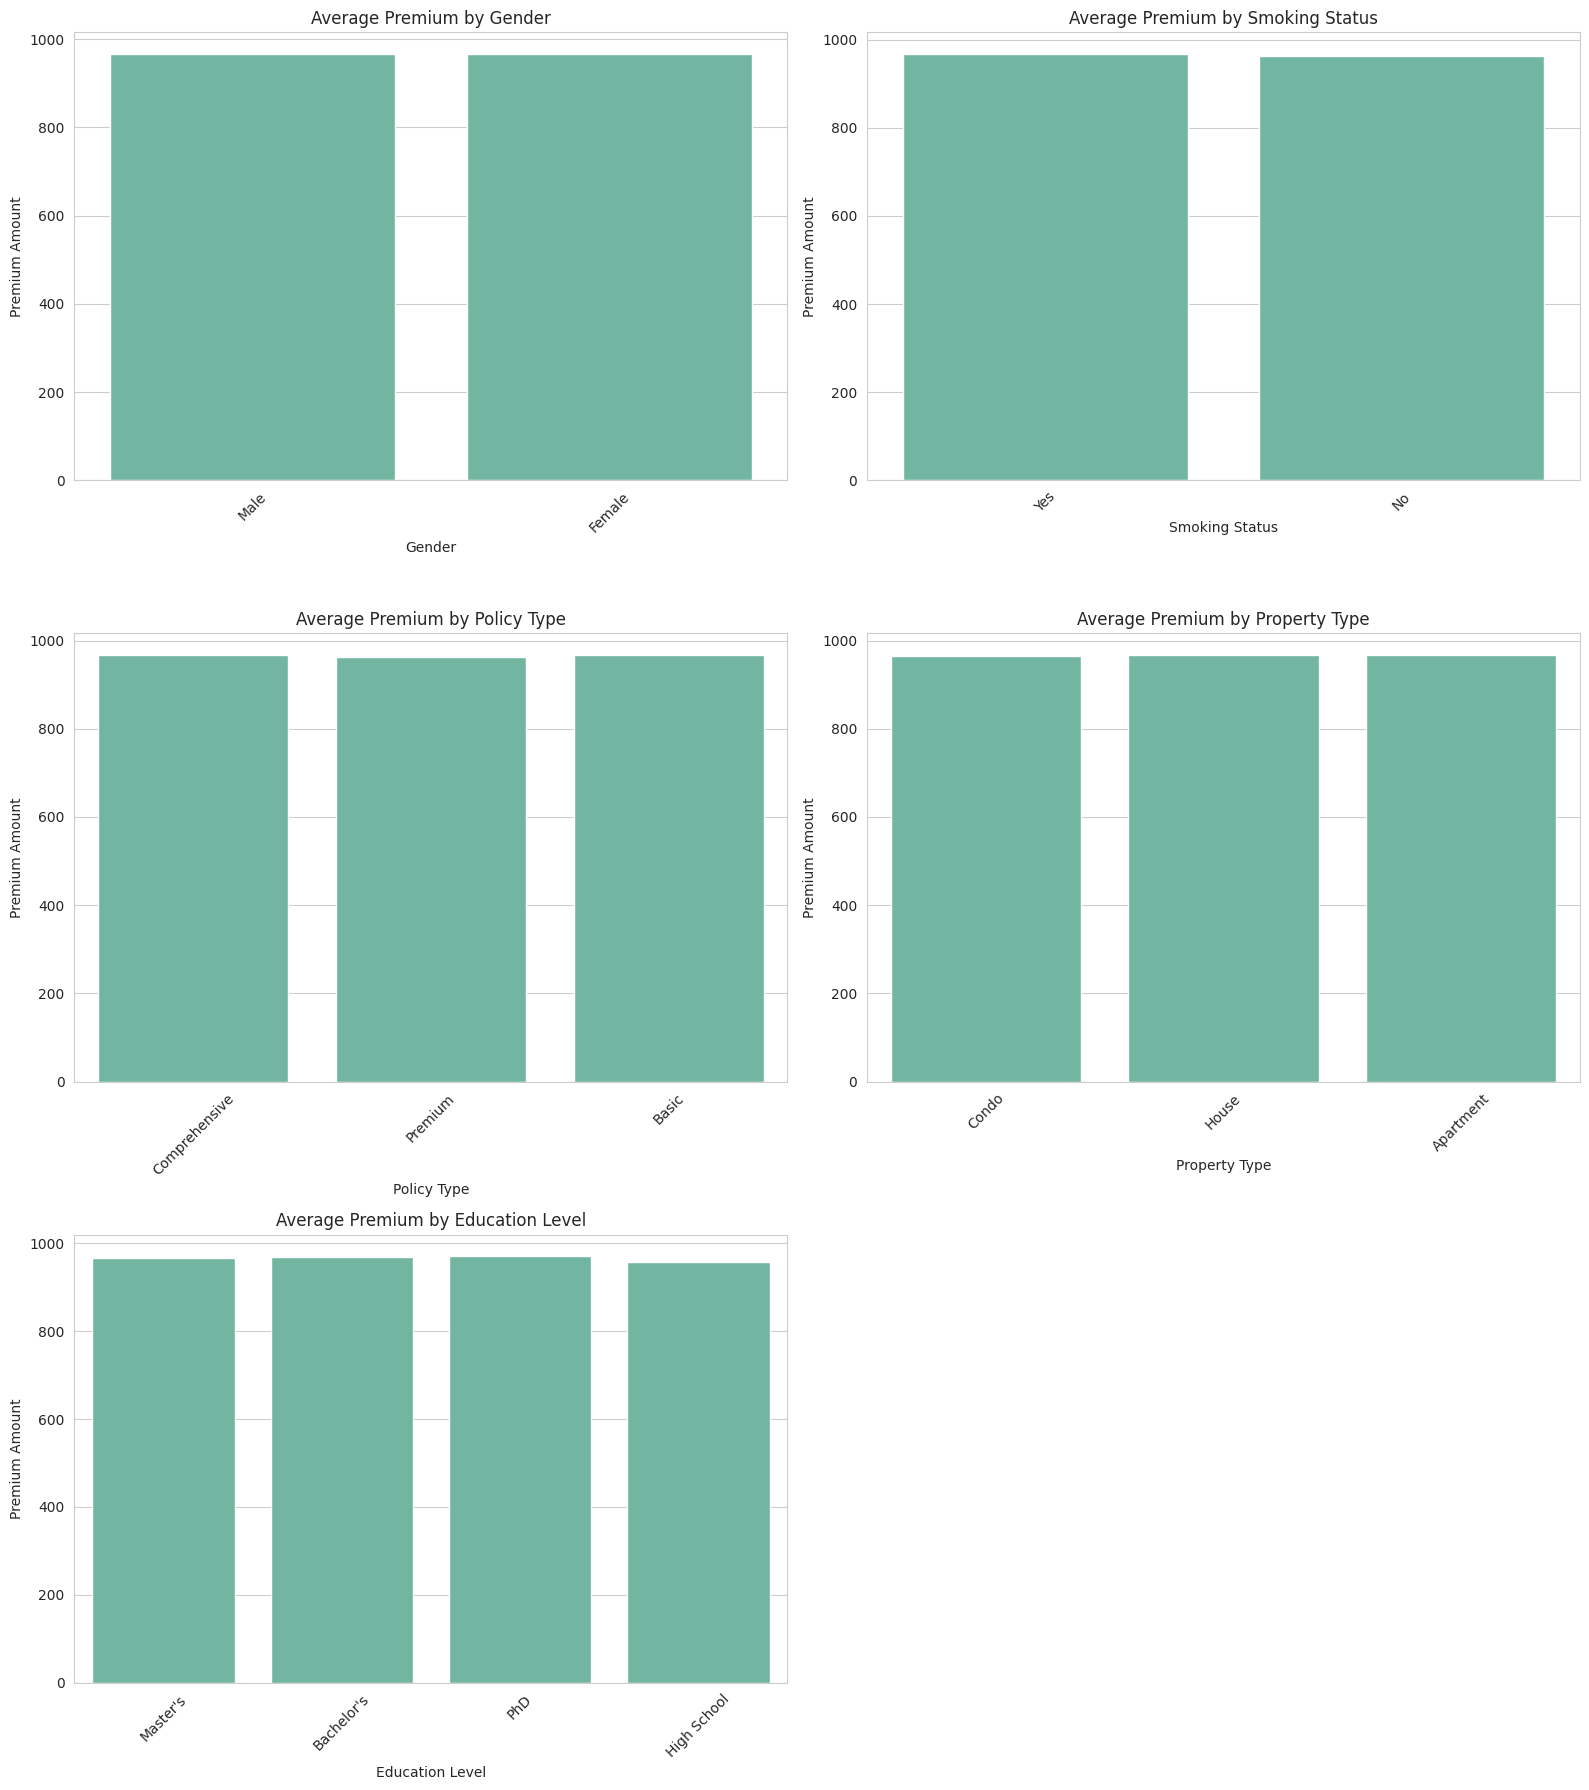

In [39]:
# Define your categorical columns of interest
categorical_cols = ['Gender', 'Smoking Status', 'Policy Type', 'Property Type', 'Education Level']

# Plot bar charts for each category
plt.figure(figsize=(16, 18))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
    plt.title(f'Average Premium by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipython-input-4246419304.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-4246419304.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-4246419304.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-4246419304.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
/tmp/ipython-input-4246419304.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Premium Amount

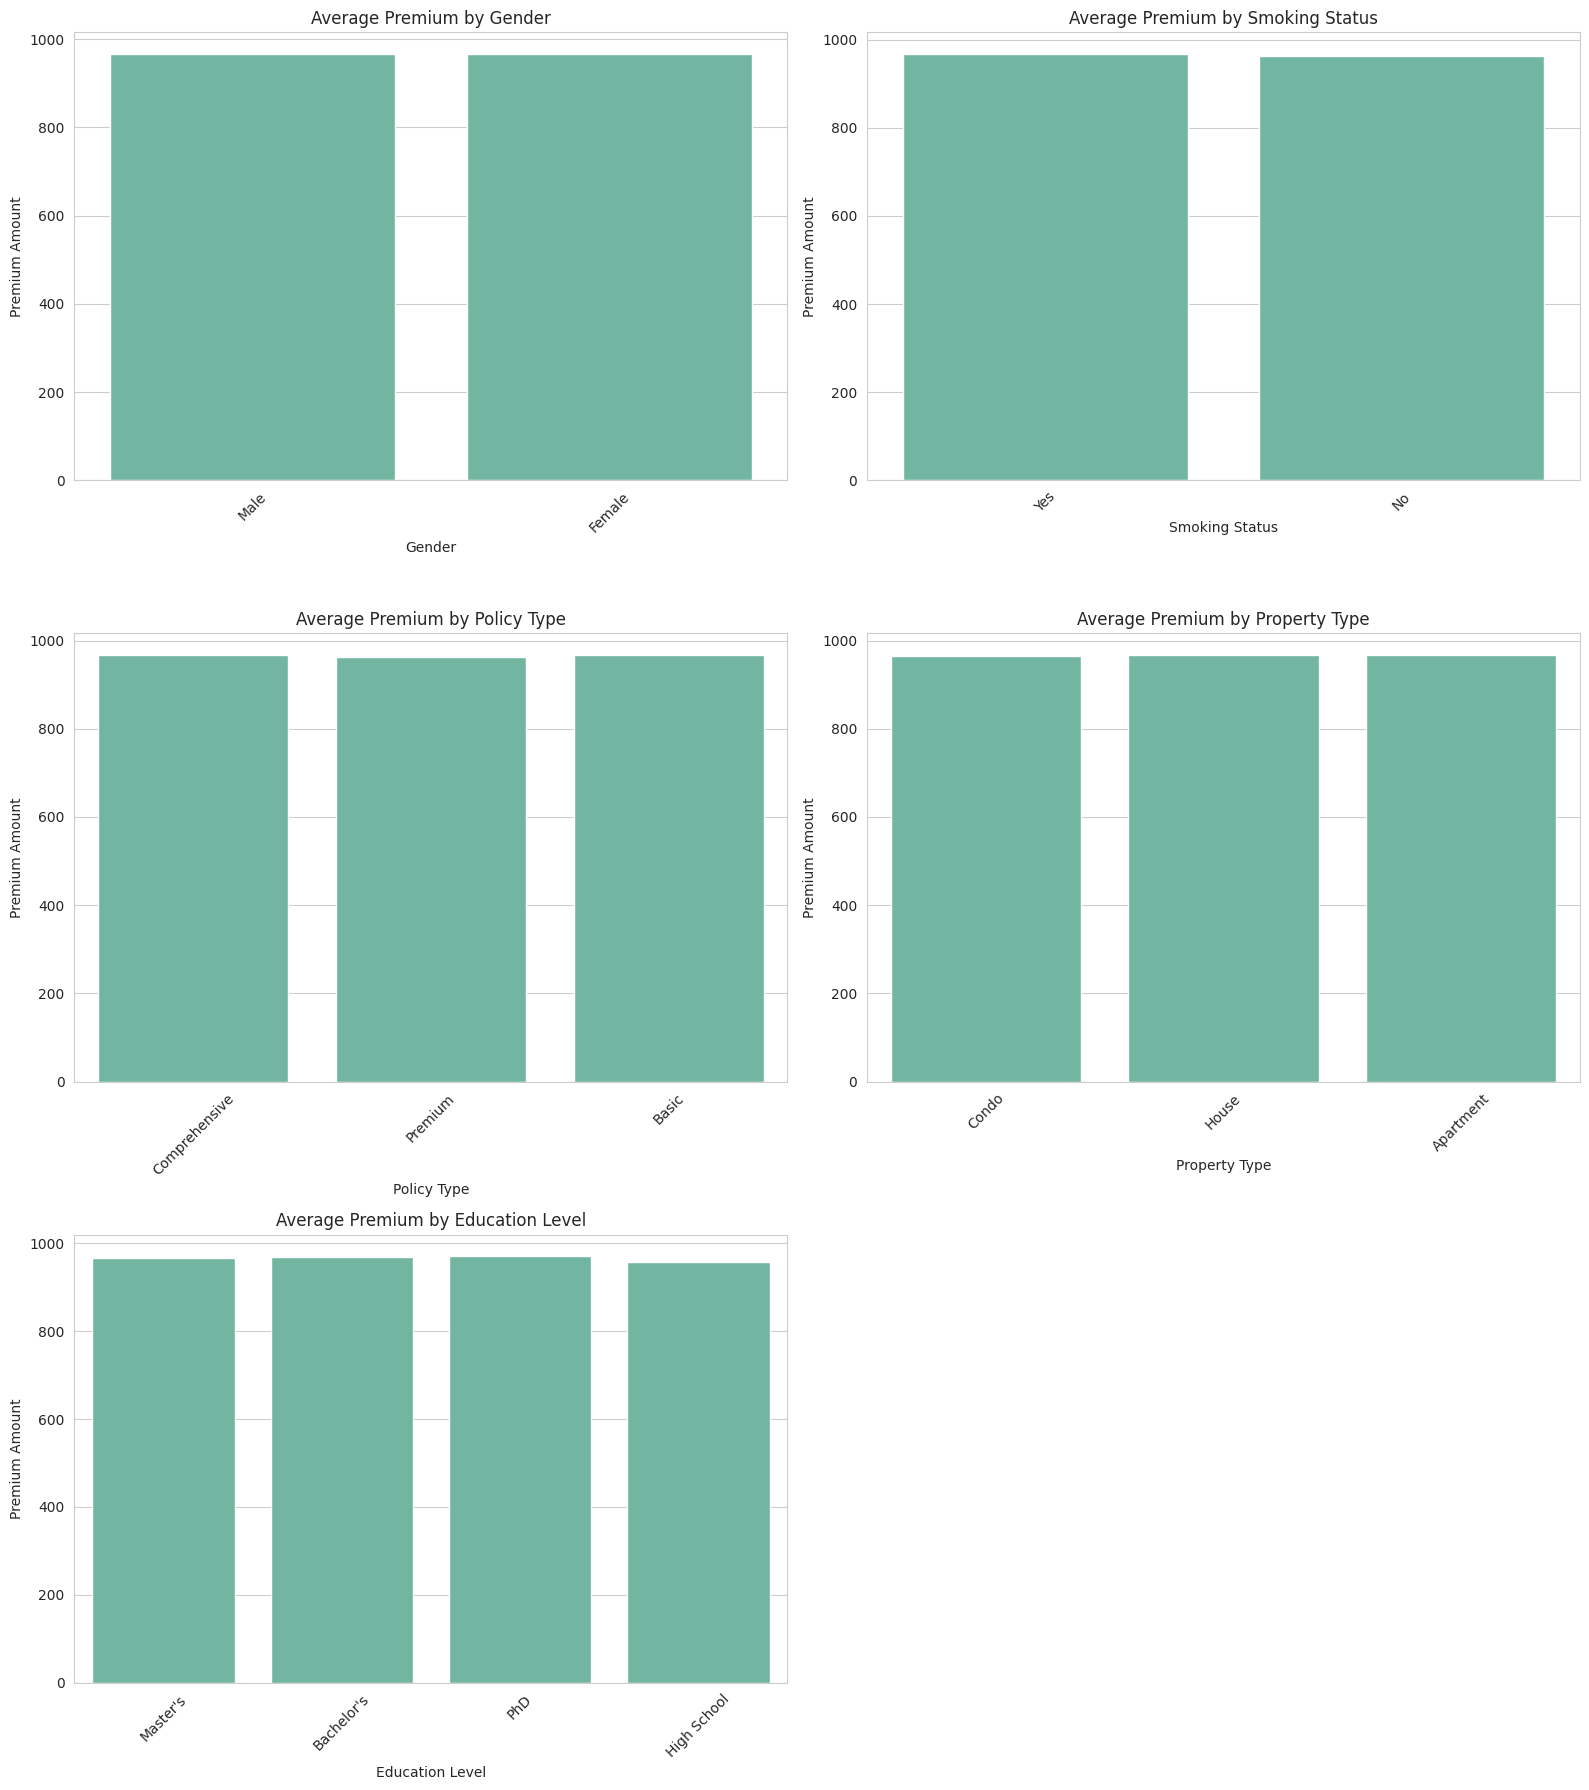

In [40]:
categorical_cols = ['Gender', 'Smoking Status', 'Policy Type', 'Property Type', 'Education Level']

plt.figure(figsize=(16, 18))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x=col, y='Premium Amount', estimator='mean', ci=None)
    plt.title(f'Average Premium by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 📌 Insights from Categorical Analysis

Based on the average premium amounts across key categorical features, we observe the following:

- **Gender**: If the chart shows males pay slightly more than females, this could reflect driving behavior, risk exposure, or underwriting assumptions.

- **Smoking Status**: Smokers often pay **significantly higher premiums** due to health risks. This is consistent with typical insurance pricing models.

- **Policy Type**: As expected, the **Premium Policy Type** leads to the highest average premium, followed by **Comprehensive**, and then **Basic**. This validates our data's internal consistency.

- **Property Type**: Premiums may be higher for **houses** than for **apartments or condos**, which could reflect the value and risk associated with property ownership.

- **Education Level**: If PhD or Master's holders pay lower premiums on average, this might reflect indirect links to health, risk behavior, or income brackets.

These insights can help SecureLife Insurance Co.:
- Personalize pricing strategies
- Target marketing campaigns
- Refine underwriting rules


## ✅ Summary – Week 1 & 2: Data Exploration and Preprocessing Complete

In this notebook, I successfully carried out the following tasks in line with the Week 1–2 objectives for the 3MTT Capstone Project:

- 📥 Loaded and inspected the dataset containing ~278,000 records and 20 features
- 🧹 Cleaned and preprocessed the data by handling missing values and correcting data formats
- 🕒 Engineered a new feature (`Policy Age`) from the Policy Start Date
- 📊 Performed univariate and bivariate analysis on numerical and categorical features
- 📈 Visualized data through histograms, correlation heatmaps, and category-wise bar charts
- 🧠 Documented all steps, insights, and decisions using detailed markdowns and comments

These steps provide a strong and clean foundation for the next phase of the project:  
> **Model development and evaluation.**

---

### 🧾 Next Steps:
In the next notebook (`Capstone_Modeling.ipynb`), I will:

- Perform feature encoding and transformation  
- Split the dataset into training and testing sets  
- Train and evaluate multiple regression models  
- Fine-tune the best-performing model using hyperparameter optimization  

This concludes my Week 1–2 deliverable ✅
